In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "./mouse_drug_data.csv"
clinical_trial_data_to_load = "./clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_data = pd.read_csv(mouse_drug_data_to_load)
 
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

merge_table = pd.merge(trial_data, mouse_data, on="Mouse ID")
merge_table.head()
drugs= merge_table["Drug"].unique()
timepoint= merge_table["Timepoint"].unique()
drugs=drugs.tolist()

merge_table.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [2]:
 # Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped = merge_table.groupby(["Drug","Timepoint"])   
# Convert to DataFrame
group =grouped.mean().reset_index()

vol_data= group[["Drug","Timepoint","Tumor Volume (mm3)"]]
vol_data.head()
group

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174
5,Capomulin,25,39.939528,0.818182
6,Capomulin,30,38.769339,1.090909
7,Capomulin,35,37.816839,1.181818
8,Capomulin,40,36.958001,1.380952
9,Capomulin,45,36.236114,1.476190


In [3]:
 # Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
data_SEM = grouped.sem().reset_index()
# Convert to DataFrame
# Preview DataFrame

vol_SEM= data_SEM[["Drug","Timepoint","Tumor Volume (mm3)"]]
vol_SEM.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
vol_response = pd.DataFrame({"Timepoint": timepoint})
vol_response=vol_response.set_index("Timepoint")

for drug in drugs:  
    vol_response[f"{drug}"]= group.loc[group["Drug"] == f"{drug}", :]["Tumor Volume (mm3)"].tolist()
    
#     print(type(mean_volumes))
#     munging[f"{i}"]=mean_volumes
#     print(f"{i}")
    
#     print(group.loc[group["Drug"] == f"{i}", :]["Tumor Volume (mm3)"])
#     print(munging[f"{i}"])
# analysis_df = pd.DataFrame({
#      "Purchase Count":purchase_gender.count()["Purchase ID"],
#      "Average Purchase Price":purchase_gender.sum()["Price"]/purchase_gender.count()["Purchase ID"],
#      "Total Purchase Value":purchase_gender.sum()["Price"],
#      "Avg Total Purchase per Person":purchase_gender.sum()["Price"] / gender_group.count()["SN"]
# })

#vol_response=vol_response.set_index("Timepoint")

vol_response


,Capomulin,Ketapril,Naftisol,Infubinol,Stelasyn,Ramicane,Propriva,Zoniferol,Placebo,Ceftamin
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.389175,46.796098,47.062001,47.527452,43.944859,47.248967,46.851818,47.125589,46.503051
10,43.084291,49.582269,48.694210,49.403909,49.463844,42.531957,49.101541,48.689881,49.423329,48.285125
15,42.064317,52.399974,50.933018,51.296397,51.529409,41.495061,51.067318,50.779059,51.359742,50.094055
20,40.716325,54.920935,53.644087,53.197691,54.067395,40.238325,53.346737,53.170334,54.364417,52.157049
25,39.939528,57.678982,56.731968,55.715252,56.166123,38.974300,55.504138,55.432935,57.482574,54.287674
30,38.769339,60.994507,59.559509,58.299397,59.826738,38.703137,58.196374,57.713531,59.809063,56.769517
35,37.816839,63.371686,62.685087,60.742461,62.440699,37.451996,60.350199,60.089372,62.420615,58.827548
40,36.958001,66.068580,65.600754,63.162824,65.356386,36.574081,63.045537,62.916692,65.052675,61.467895


In [5]:
vol_response['Capomulin'].tolist()

err1 = vol_SEM[vol_SEM['Drug']== 'Capomulin']
err1 = err1["Tumor Volume (mm3)"]
err2 = vol_SEM[vol_SEM['Drug']== 'Infubinol']
err2 = err2["Tumor Volume (mm3)"]
err3 = vol_SEM[vol_SEM['Drug']== 'Ketapril']
err3 = err3["Tumor Volume (mm3)"]
err4 = vol_SEM[vol_SEM['Drug']== 'Placebo']
err4 = err4["Tumor Volume (mm3)"]




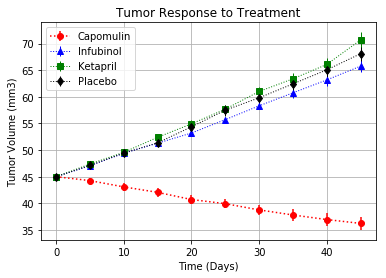

In [6]:
 # Generate the Plot (with Error Bars)
drugs_to_plot = ['Capomulin','Infubinol','Ketapril','Placebo']
fig, response = plt.subplots()

#Capomulin, = plt.plot(timepoint,vol_response['Capomulin'].tolist(), marker="o",color="Red", linewidth=1, label="Capomulin")
# Infubinol, = plt.plot(timepoint,vol_response['Infubinol'].tolist(), marker="^",color="b", linewidth=1, label="Infubinol")
# Ketapril, = plt.plot(timepoint,vol_response['Ketapril'].tolist(), marker="s",color="g", linewidth=1, label="Ketapril")
# Placebo, = plt.plot(timepoint,vol_response['Placebo'].tolist(), marker="d",color="k", linewidth=1, label="Placebo")
response.grid(True)

Capomulin=response.errorbar(timepoint, vol_response['Capomulin'].tolist(), err1, fmt="",marker="o",linestyle= ":",color="Red", label="Capomulin")
Infubinol=response.errorbar(timepoint, vol_response['Infubinol'].tolist(), err2, fmt="",marker="^",linestyle= ":",color="b", linewidth=1, label="Infubinol")
Ketapril=response.errorbar(timepoint, vol_response['Ketapril'].tolist(), err3, fmt="",marker="s",linestyle= ":",color="g", linewidth=1, label="Ketapril")
Placebo=response.errorbar(timepoint, vol_response['Placebo'].tolist(), err4, fmt="",marker="d",linestyle= ":",color="k", linewidth=1, label="Placebo")


plt.title("Tumor Response to Treatment")
plt.legend(loc="best")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("./Tumor_Response.png")
plt.show()



In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

met_site = group[["Drug","Timepoint","Metastatic Sites"]]

# Convert to DataFrame

# Preview DataFrame
met_site.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
 # Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
met_sites_SEM= data_SEM[["Drug","Timepoint","Metastatic Sites"]]
met_sites_SEM.head()

merr1 = met_sites_SEM[met_sites_SEM['Drug']== 'Capomulin']
merr1 = merr1["Metastatic Sites"]
merr2 = met_sites_SEM[met_sites_SEM['Drug']== 'Infubinol']
merr2 = merr2["Metastatic Sites"]
merr3 = met_sites_SEM[met_sites_SEM['Drug']== 'Ketapril']
merr3 = merr3["Metastatic Sites"]
merr4 = met_sites_SEM[met_sites_SEM['Drug']== 'Placebo']
merr4 = merr4["Metastatic Sites"]



In [9]:
met_site_response = pd.DataFrame({"Timepoint": timepoint})
met_site_response=met_site_response.set_index("Timepoint")

for drug in drugs:  
    met_site_response[f"{drug}"]= group.loc[group["Drug"] == f"{drug}", :]["Metastatic Sites"].tolist()
    
met_site_response 

,Capomulin,Ketapril,Naftisol,Infubinol,Stelasyn,Ramicane,Propriva,Zoniferol,Placebo,Ceftamin
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.304348,0.260870,0.280000,0.240000,0.120000,0.320000,0.166667,0.375000,0.380952
10,0.320000,0.590909,0.523810,0.666667,0.478261,0.250000,0.565217,0.500000,0.833333,0.600000
15,0.375000,0.842105,0.857143,0.904762,0.782609,0.333333,0.764706,0.809524,1.250000,0.789474
20,0.652174,1.210526,1.150000,1.050000,0.952381,0.347826,1.000000,1.294118,1.526316,1.111111
25,0.818182,1.631579,1.500000,1.277778,1.157895,0.652174,1.357143,1.687500,1.941176,1.500000
30,1.090909,2.055556,2.066667,1.588235,1.388889,0.782609,1.615385,1.933333,2.266667,1.937500
35,1.181818,2.294118,2.266667,1.666667,1.562500,0.952381,2.300000,2.285714,2.642857,2.071429
40,1.380952,2.733333,2.466667,2.100000,1.583333,1.100000,2.777778,2.785714,3.166667,2.357143


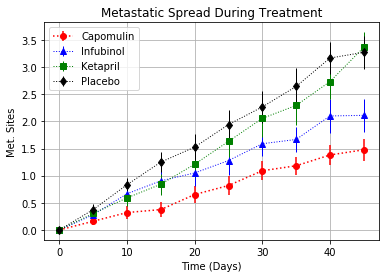

In [10]:
drugs_to_plot = ['Capomulin','Infubinol','Ketapril','Placebo']
fig, metfig = plt.subplots()
metfig.grid(True)

Capomulin=metfig.errorbar(timepoint, met_site_response['Capomulin'].tolist(), merr1, fmt="",marker="o",linestyle= ":",color="Red", label="Capomulin")
Infubinol=metfig.errorbar(timepoint, met_site_response['Infubinol'].tolist(), merr2, fmt="",marker="^",linestyle= ":",color="b", linewidth=1, label="Infubinol")
Ketapril=metfig.errorbar(timepoint, met_site_response['Ketapril'].tolist(), merr3, fmt="",marker="s",linestyle= ":",color="g", linewidth=1, label="Ketapril")
Placebo=metfig.errorbar(timepoint, met_site_response['Placebo'].tolist(), merr4, fmt="",marker="d",linestyle= ":",color="k", linewidth=1, label="Placebo")

plt.title("Metastatic Spread During Treatment")
plt.legend(loc="best")
plt.xlabel("Time (Days)")
plt.ylabel("Met. Sites")
plt.savefig("./met sites.png")
plt.show()




In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


mouse_count= grouped.count().reset_index()

mouse_count.head()

,Drug,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,25,25,25
1,Capomulin,5,25,25,25
2,Capomulin,10,25,25,25
3,Capomulin,15,24,24,24
4,Capomulin,20,23,23,23


In [12]:
 # Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame

mouse_house = pd.DataFrame({"Timepoint": timepoint})
mouse_house = mouse_house.set_index("Timepoint")

for drug in drugs:  
    mouse_house[f"{drug}"]= mouse_count.loc[mouse_count["Drug"] == f"{drug}", :]["Mouse ID"].tolist()
    
mouse_house 

,Capomulin,Ketapril,Naftisol,Infubinol,Stelasyn,Ramicane,Propriva,Zoniferol,Placebo,Ceftamin
Timepoint,,,,,,,,,,
0,25,25,25,25,26,25,26,25,25,25
5,25,23,23,25,25,25,25,24,24,21
10,25,22,21,21,23,24,23,22,24,20
15,24,19,21,21,23,24,17,21,20,19
20,23,19,20,20,21,23,17,17,19,18
25,22,19,18,18,19,23,14,16,17,18
30,22,18,15,17,18,23,13,15,15,16
35,22,17,15,12,16,21,10,14,14,14
40,21,15,15,10,12,20,9,14,12,14


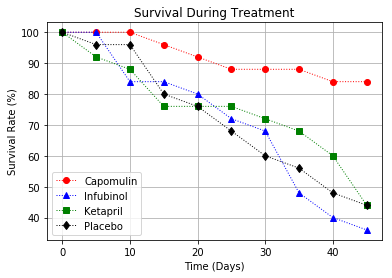

In [13]:
percent_mouse=(mouse_house/25)*100

drugs_to_plot = ['Capomulin','Infubinol','Ketapril','Placebo']
fig, mouseplot = plt.subplots()
mouseplot.grid(True)

Capomulin, = plt.plot(timepoint,percent_mouse['Capomulin'].tolist(), marker="o",linestyle= ":",color="Red", linewidth=1, label="Capomulin")
Infubinol, = plt.plot(timepoint,percent_mouse['Infubinol'].tolist(), marker="^",linestyle= ":",color="b", linewidth=1, label="Infubinol")
Ketapril, = plt.plot(timepoint,percent_mouse['Ketapril'].tolist(), marker="s",linestyle= ":",color="g", linewidth=1, label="Ketapril")
Capomulin, = plt.plot(timepoint,percent_mouse['Placebo'].tolist(), marker="d",linestyle= ":",color="k", linewidth=1, label="Placebo")


plt.title("Survival During Treatment")
plt.legend(loc="best")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.savefig("./Survival.png")
plt.show()

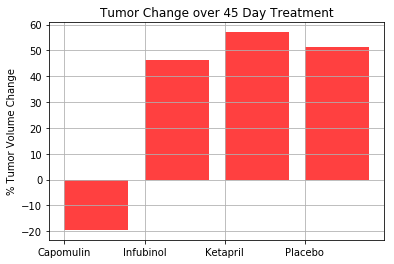

In [14]:
# Store all Relevant Percent Changes into a Tuple

percent_change_summary = (vol_response.loc[45,:] - vol_response.loc[0,:])/45 *100
percent_change_summary

summ_df=pd.DataFrame(percent_change_summary)

summ_df = summ_df.rename(columns={0: 'Percent Change'})

summ_df["pass/fail"]=percent_change_summary > 0


summ_df


pchange=tuple(percent_change_summary)

# Splice the data between passing and failing drugs
pass_fail=[percent_change_summary > 0]



# Orient widths. Add labels, tick marks, etc. 

drugs_to_plot
x_axis = np.arange(len(drugs_to_plot))
x_axis
change_list=summ_df.loc[drugs_to_plot]

fig, barchart = plt.subplots()
barchart.grid(True)
barchart.bar(x_axis, change_list["Percent Change"], facecolor="red", alpha=.75, align="edge")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs_to_plot)


plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.savefig("./change.png")
plt.show()

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()